In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys

sys.path.insert(0,'../scripts/tools_for_VAE/')
import tools_for_VAE
from tools_for_VAE import utils, plot

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

In [2]:
training_or_test = 'test'
data_dir = '../images/single/' + training_or_test
root = 'galaxies_isolated_20190927'

In [3]:
dfs = []
for i in range(1):
    dfs.append(pd.read_csv(os.path.join(data_dir, root+'_{}_data.csv'.format(i))))
df = dfs[0]
for df2 in dfs[1:]:
    df = df.append(df2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
redshift        300 non-null float64
moment_sigma    300 non-null float64
e1              300 non-null float64
e2              300 non-null float64
e1_obs          300 non-null float64
e2_obs          300 non-null float64
SNR             300 non-null float64
SNR_peak        300 non-null float64
dtypes: float64(8)
memory usage: 18.8 KB


In [5]:
df.head()

,redshift,moment_sigma,e1,e2,e1_obs,e2_obs,SNR,SNR_peak
0,0.3301,2.353559,-0.266782,0.233254,-0.120161,0.104187,998.753977,1.923716
1,4.2916,1.575005,0.740713,0.027246,0.082175,0.003064,19.633977,0.034624
2,0.3586,2.641967,-0.092189,0.369457,-0.046881,0.204779,423.015153,0.611760
3,0.9434,2.637097,0.272485,0.526306,0.176059,0.340811,16.683419,0.019727
4,1.1132,1.805453,0.461782,0.289766,0.134822,0.084535,10.242211,0.016251


In [6]:
df.describe()

,redshift,moment_sigma,e1,e2,e1_obs,e2_obs,SNR,SNR_peak
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.070501,1.995123,0.035108,0.019893,0.012269,0.007038,61.379351,0.088367
std,0.780282,0.459527,0.459420,0.450504,0.178861,0.181022,120.172325,0.179290
min,0.030000,1.527071,-0.987078,-0.987945,-0.486964,-0.651320,3.093174,0.005206
25%,0.569200,1.690762,-0.298229,-0.296287,-0.092443,-0.081842,14.776328,0.023425
50%,0.834150,1.863681,0.015469,0.014170,0.005722,0.004491,23.875808,0.035987
75%,1.293650,2.119330,0.393038,0.337295,0.115039,0.103277,44.842347,0.066917
max,4.574900,5.055300,1.295658,1.050116,0.665124,0.636830,998.753977,1.923716


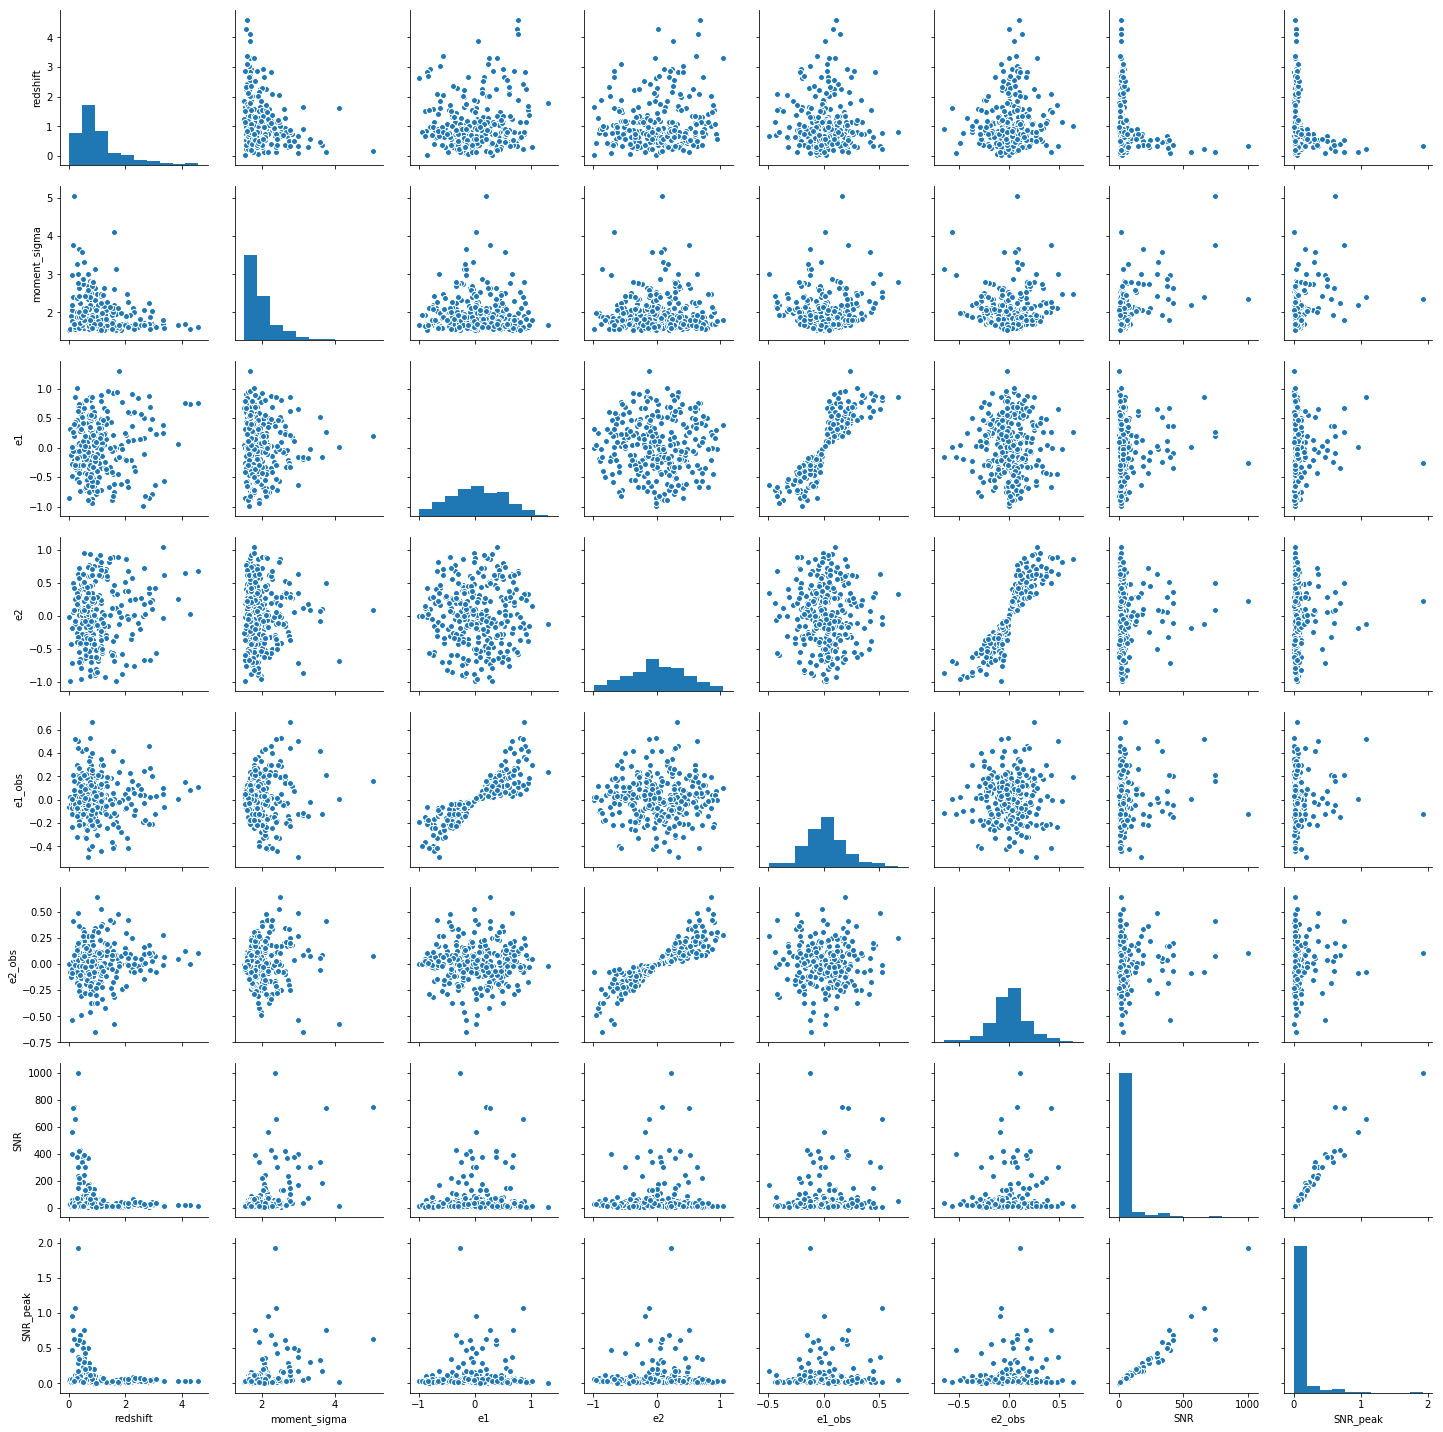

In [7]:
sns.pairplot(df)

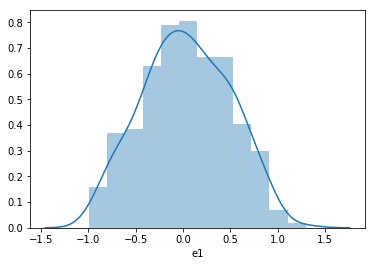

In [8]:
sns.distplot(df['e1'])

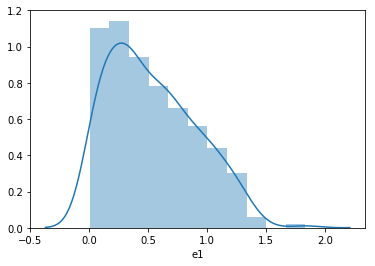

In [9]:
sns.distplot(np.sqrt(df['e1']**2+df['e1']**2))

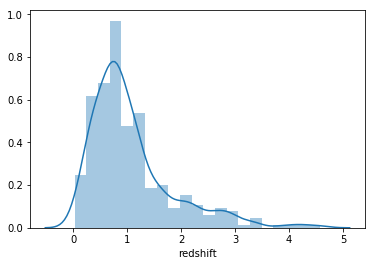

In [10]:
sns.distplot(df['redshift'])

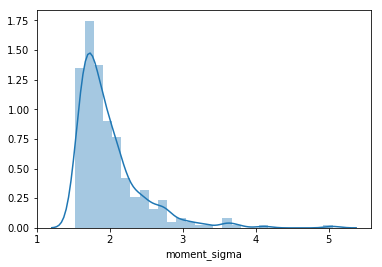

In [11]:
sns.distplot(df['moment_sigma'])

Text(0.5,0,'SNR')

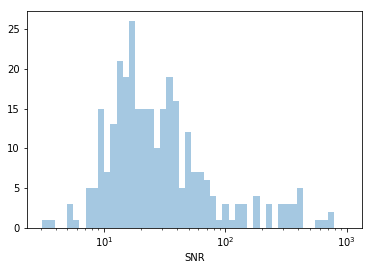

In [12]:
sns.distplot(df['SNR'], bins=np.geomspace(np.min(df['SNR']), np.max(df['SNR']), 50), kde=False)
plt.xscale('log')
plt.xlabel('SNR')

In [13]:
galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(0)))
if training_or_test == 'test':
    _ = utils.norm(galaxies[:,0], bands=range(10), channel_last=False)
    _ = utils.norm(galaxies[:,1], bands=range(10), channel_last=False)

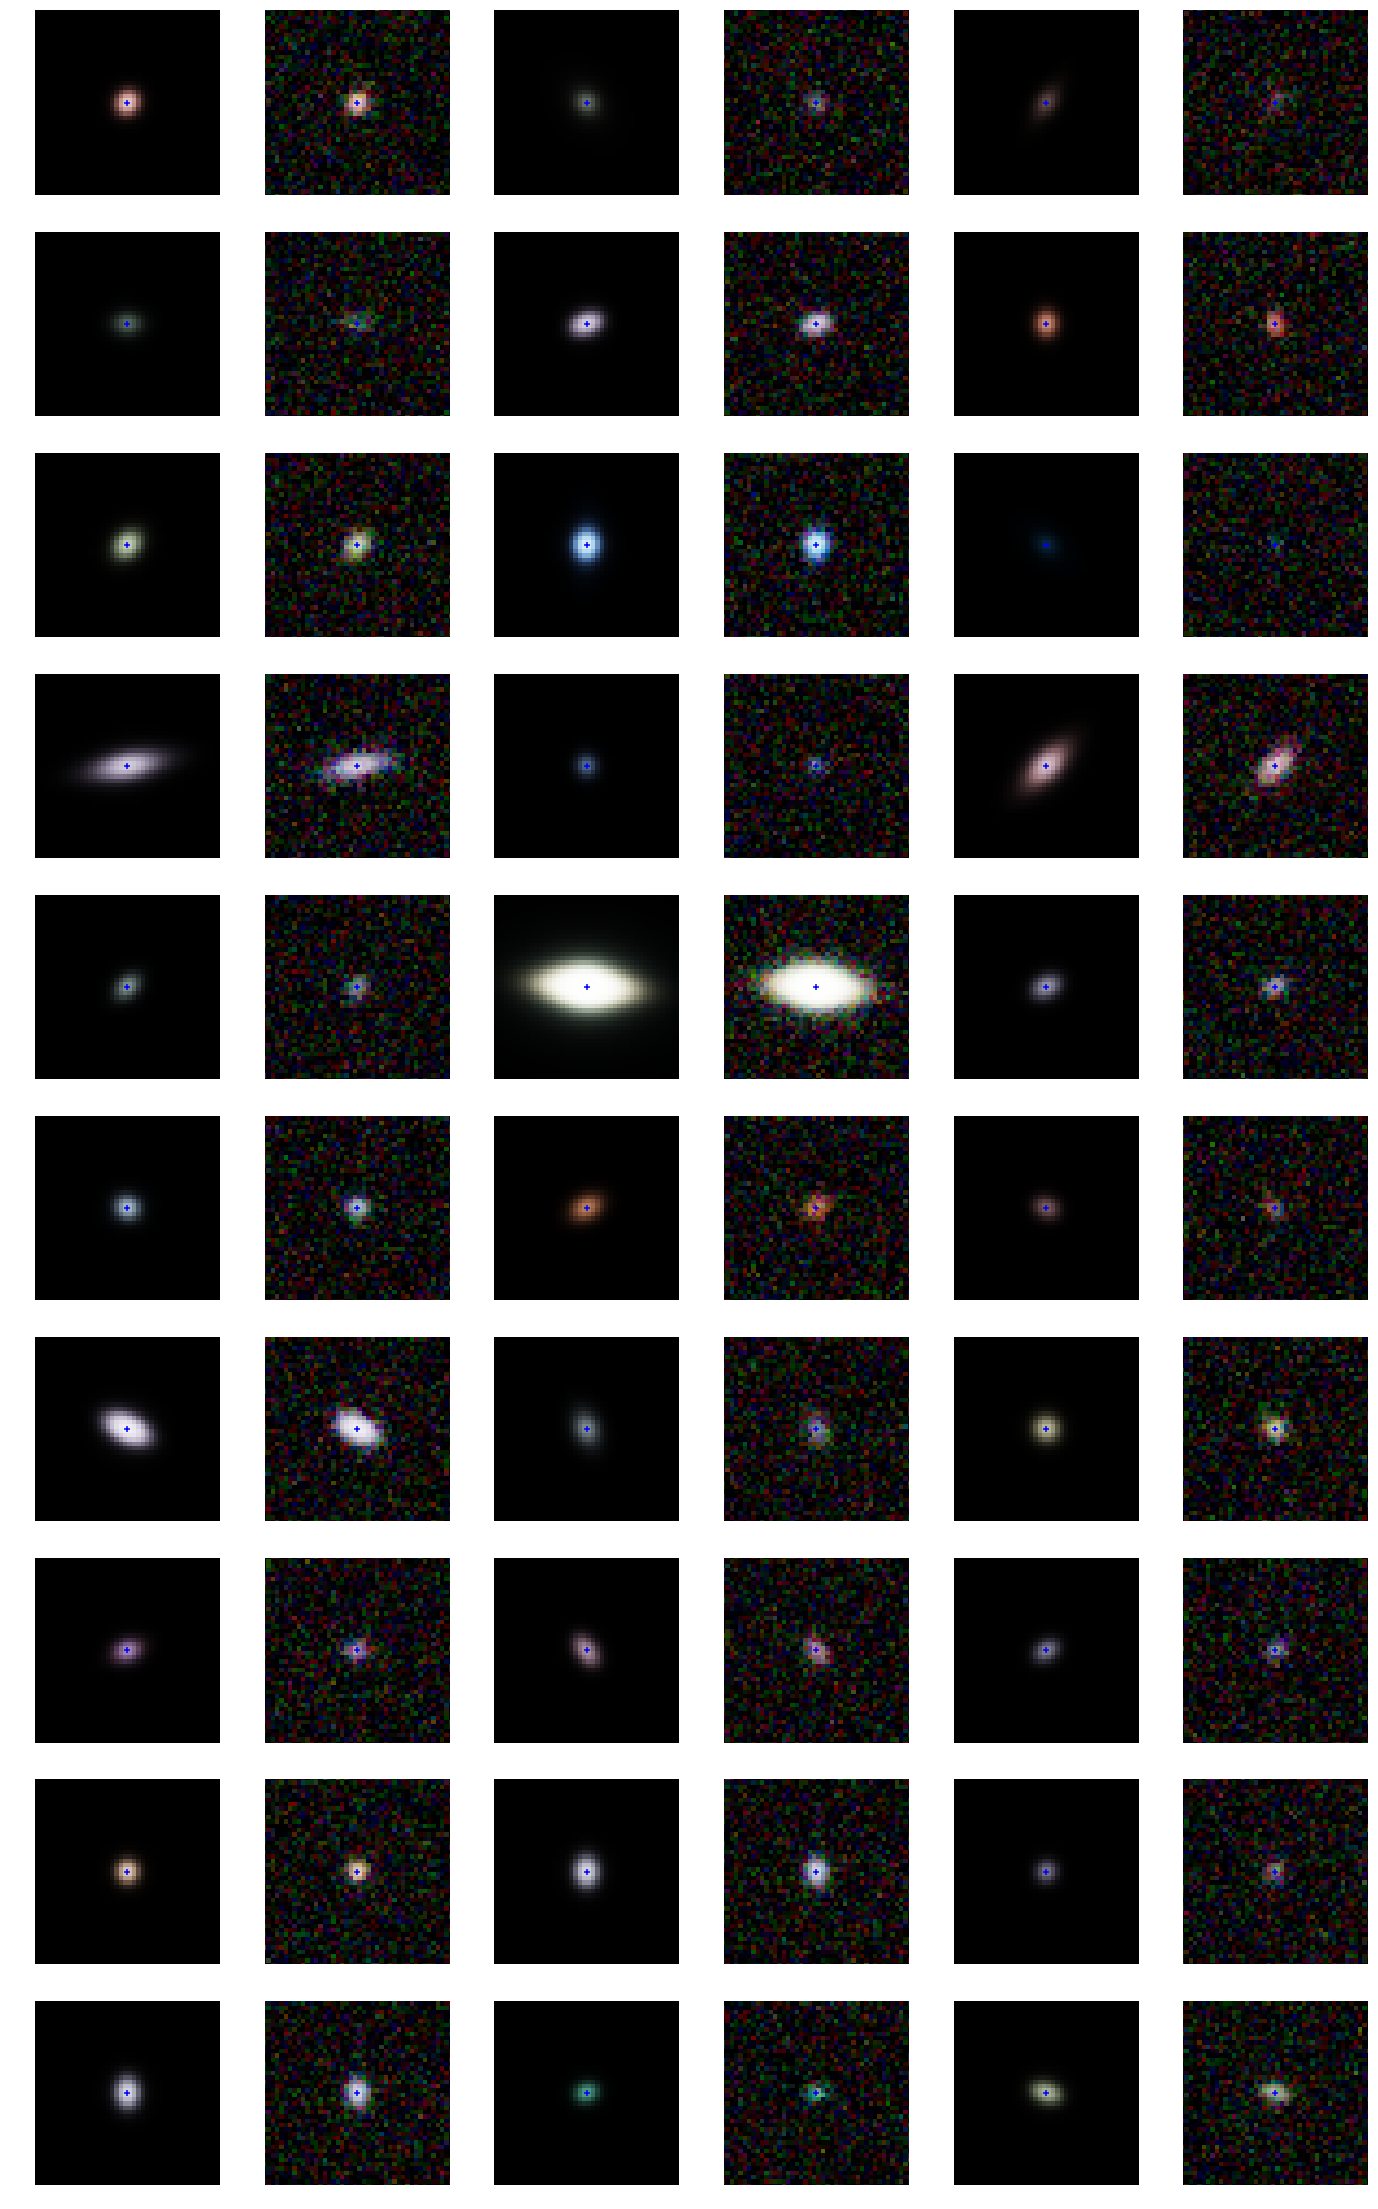

In [14]:
N = 10

fig, axes = plt.subplots(N,6, figsize=(6*4,N*4))
for i in range(N):
    for j in range(3):
        gal = galaxies[np.random.choice(range(len(galaxies)))]
        for k in range(2):
            plot.plot_rgb(gal[k], ax=axes[i,j*2+k])

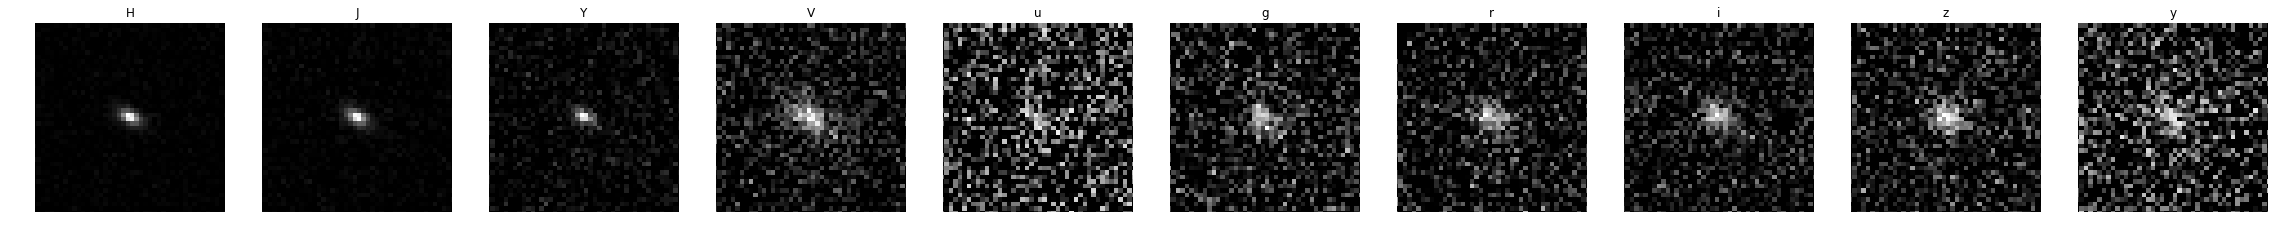

In [16]:
plot.plot_all_bands(galaxies[3,1], band_first=True, cmap=mpl.cm.gray)